# Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pybaseball import batting_stats
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
batting_df = batting_stats(2025)
batting_df.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,15640,2025,Aaron Judge,NYY,33,152,541,679,179,94,30,2,53,137,114,124,36,160,7,7,0,16,12,5,0.331,132,180,76,12,2634,1089,1545,6,0,0,0.183,0.236,0.78,0.457,0.688,1.144,0.357,0.376,0.0073,0.196,0.340,0.464,0.067,0.294,0.045,0.000,0.463,82.5,163,83.6,6.4,20.7,-10.3,99.0,10.1,$81.0,4.6,204,5.61,-8.63,14.24,73.78,7.67,0.90,2.81,1,7.71,-1.50,0.401,94.9,0.280,85.6,0.090,89.3,0.078,80.8,0.109,85.9,0.042,87.0,NaN,NaN,0.050,NaN,41.2,9.5,16.6,-0.1,8.9,-2.8,NaN,3.91,1.28,6.99,-0.07,3.09,-2.58,NaN,0.257,0.703,0.437,0.444,0.802,0.676,0.402,0.554,0.141,-4.1,0.259,NaN,0.086,0.041,NaN,0.137,0.287,0.063,0.017,0.000,0.111,NaN,NaN,NaN,95.1,NaN,89.9,87.1,NaN,94.5,85.6,80.3,81.3,55.3,85.9,NaN,NaN,-2.2,NaN,0.6,-5.8,NaN,-6.9,3.0,2.4,3.4,-2.9,-1.7,NaN,NaN,9.3,NaN,4.3,2.3,NaN,4.6,0.9,-5.1,-6.3,-2.6,2.8,NaN,NaN,20.6,NaN,14.6,-2.8,NaN,20.3,11.1,-0.3,-0.5,-0.3,9.0,NaN,NaN,3.02,NaN,6.50,-2.59,NaN,5.63,1.47,-0.16,-1.11,-30.20,3.09,NaN,NaN,0.223,0.659,0.437,0.334,0.796,0.676,0.490,19.0,-3.8,-0.9,NaN,33 - 33,79.5,2.7,NaN,0.366,0.374,0.260,0.098,0.446,0.456,0.496,0.111,NaN,0.071,0.260,0.082,0.038,NaN,NaN,0.138,0.300,NaN,85.8,NaN,80.2,95.0,89.7,87.0,NaN,NaN,94.5,85.5,NaN,-1.6,NaN,2.9,-2.0,1.0,-5.8,NaN,NaN,-6.6,3.4,NaN,1.4,NaN,-7.4,8.4,3.4,0.6,NaN,NaN,3.4,-0.5,NaN,8.7,NaN,-1.2,19.3,16.7,-2.7,NaN,NaN,19.3,11.9,NaN,2.97,NaN,-0.65,2.83,7.76,-2.63,NaN,NaN,5.32,1.51,NaN,0.225,0.659,0.437,0.356,0.788,0.674,0.488,19.0,NaN,136,221,105,146,170,220,130,1.00,83,118,242,89,108,108,62,86,141,95.4,19.1,96,0.247,118.1,226,0.582,388,0.150,0.292,0.315,0.735,0.475,10.2
3,21534,2025,Cal Raleigh,SEA,28,159,596,705,147,63,2

In [4]:
stats = batting_df[['Name', 'PA', 'AVG', 'OBP', 'OPS', 'HR', 'RBI', 'K%', 'Hard%', 'SB']]
stats.head()

,Name,PA,AVG,OBP,OPS,HR,RBI,K%,Hard%,SB
0,Aaron Judge,679,0.331,0.457,1.144,53,114,0.236,0.456,12
3,Cal Raleigh,705,0.247,0.359,0.948,60,125,0.267,0.382,14
22,Bobby Witt Jr.,687,0.295,0.351,0.852,23,88,0.182,0.404,38
1,Shohei Ohtani,727,0.282,0.392,1.014,55,102,0.257,0.453,20
8,Geraldo Perdomo,720,0.290,0.389,0.851,20,100,0.115,0.281,27


In [5]:
sb_percentage = batting_df['SB'] / (batting_df['SB'] + batting_df['CS'])
stats['SB%'] = sb_percentage
stats = stats.sort_index()
stats.head()

/var/folders/y2/ffmphcn51c18jj38jsf88tyc0000gn/T/ipykernel_99546/788467766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['SB%'] = sb_percentage


,Name,PA,AVG,OBP,OPS,HR,RBI,K%,Hard%,SB,SB%
0,Aaron Judge,679,0.331,0.457,1.144,53,114,0.236,0.456,12,0.705882
1,Shohei Ohtani,727,0.282,0.392,1.014,55,102,0.257,0.453,20,0.769231
2,George Springer,586,0.309,0.399,0.959,32,84,0.189,0.353,18,0.947368
3,Cal Raleigh,705,0.247,0.359,0.948,60,125,0.267,0.382,14,0.777778
4,Kyle Schwarber,724,0.240,0.365,0.928,56,132,0.272,0.453,10,0.833333


In [6]:
names = stats['Name']
no_name_pa_df = stats.drop(['Name', 'PA'], axis=1)
no_name_pa_df.head()

,AVG,OBP,OPS,HR,RBI,K%,Hard%,SB,SB%
0,0.331,0.457,1.144,53,114,0.236,0.456,12,0.705882
1,0.282,0.392,1.014,55,102,0.257,0.453,20,0.769231
2,0.309,0.399,0.959,32,84,0.189,0.353,18,0.947368
3,0.247,0.359,0.948,60,125,0.267,0.382,14,0.777778
4,0.240,0.365,0.928,56,132,0.272,0.453,10,0.833333


In [7]:
scaler = MinMaxScaler()
norm_array = scaler.fit_transform(no_name_pa_df)
norm_df = pd.DataFrame(norm_array,columns=no_name_pa_df.columns)
norm_df.insert(0, 'Name', names)
norm_df = norm_df.fillna(0)
norm_df.head()

,Name,AVG,OBP,OPS,HR,RBI,K%,Hard%,SB,SB%
0,Aaron Judge,1.000000,1.000000,1.000000,0.877193,0.834862,0.702055,1.000000,0.272727,0.705882
1,Shohei Ohtani,0.625954,0.656085,0.764065,0.912281,0.724771,0.773973,0.989130,0.454545,0.769231
2,George Springer,0.832061,0.693122,0.664247,0.508772,0.559633,0.541096,0.626812,0.409091,0.947368
3,Cal Raleigh,0.358779,0.481481,0.644283,1.000000,0.935780,0.808219,0.731884,0.318182,0.777778
4,Kyle Schwarber,0.305344,0.513228,0.607985,0.929825,1.000000,0.825342,0.989130,0.227273,0.833333


In [8]:
hr_rating = 0.23 * norm_df['HR']
obp_rating = 0.15 * norm_df['OBP']
ops_rating = 0.14 * norm_df['OPS']
avg_rating = 0.10 * norm_df['AVG']
k_percent_rating = 0.10 * (1 - norm_df['K%'])
rbi_rating = 0.10 * norm_df['RBI']
sb_rating = 0.08 * norm_df['SB']
sb_percent_rating = 0.06 * norm_df['SB%']
hard_percent_rating = 0.04 * norm_df['Hard%']
rating = hr_rating + obp_rating + ops_rating + avg_rating + k_percent_rating + rbi_rating + sb_rating + sb_percent_rating + hard_percent_rating
rating = rating * 100
rating.head()

0    80.920627
1    69.496433
2    61.368202
3    64.245236
4    63.170888
dtype: float64

In [9]:
rating_lst = rating.tolist()
tmp_rating_dict = {'Rating': rating_lst}
rating_df = pd.DataFrame(tmp_rating_dict)
rating_df.insert(0, 'Name', names)
rating_df = rating_df.sort_values(by='Rating', ascending=False)
rating_df.head()

,Name,Rating
0,Aaron Judge,80.920627
1,Shohei Ohtani,69.496433
5,Juan Soto,67.629659
3,Cal Raleigh,64.245236
4,Kyle Schwarber,63.170888


In [10]:
top_ten_ratings = rating_df.iloc[:9, :]
top_ten_ratings

,Name,Rating
0,Aaron Judge,80.920627
1,Shohei Ohtani,69.496433
5,Juan Soto,67.629659
3,Cal Raleigh,64.245236
4,Kyle Schwarber,63.170888
2,George Springer,61.368202
23,Jose Ramirez,59.421086
8,Geraldo Perdomo,55.357864
22,Bobby Witt Jr.,54.288749


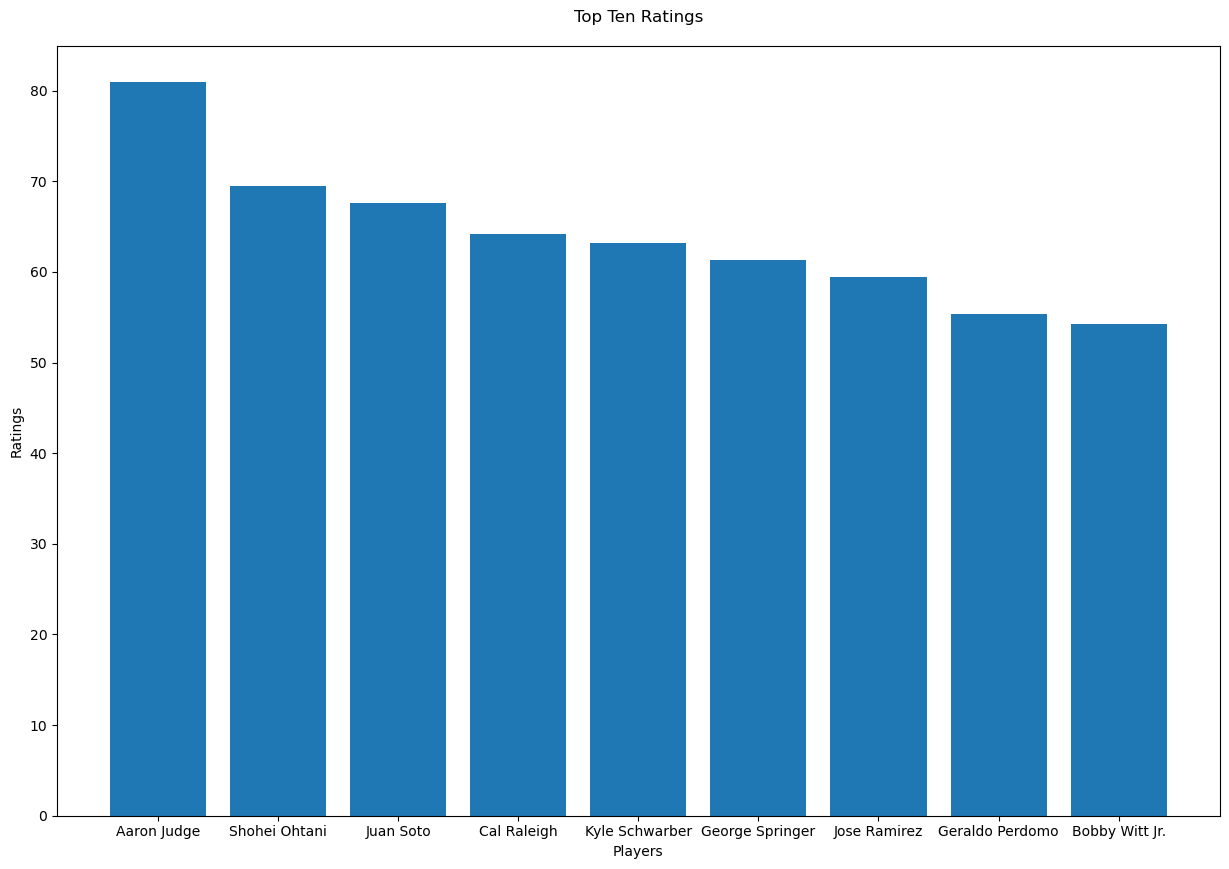

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(top_ten_ratings['Name'], top_ten_ratings['Rating'])
plt.title('Top Ten Ratings', y=1.02)
plt.xlabel('Players')
plt.ylabel('Ratings')
plt.show()